In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from jupyter_datatables import init_datatables_mode
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
# Data reading
data = pd.read_csv("dataset.csv")
data.head()
len(data)

159541

In [3]:
#International matches>0
data_int = data[data["IntCaps"]>0]
#data_int.describe()

In [4]:
# #Goal Opportunity Segregation:
# f = data_int_yes = data_int[data_int["Goal Opportunity"] == "Yes"]
# d = data_int_maybe = data_int[data_int["Goal Opportunity"] == "maybe"]
# g = data_int_no = data_int[data_int["Goal Opportunity"] == "No"]
# f_, d_, g_= f["GPM"][f["GPM"]>0] , d["GPM"][d["GPM"]>0], g["GPM"][g["GPM"]>0]

In [5]:
#"Attacker" ,f["IntGoals"].describe() , "Defender", d["IntGoals"].describe(), "Goal Keeper", g["IntGoals"].describe()

In [6]:
#f_.describe(), d_.describe(), g_.describe()

In [7]:
# #removing No since count of No is only 5
# data_int_y_m = data_int #(data_int["Goal Opportunity"]!="No")&
# ax = sns.boxplot(x = data_int_y_m["Goal Opportunity - 2"],y = data_int_y_m["IntCaps"], showfliers=False)
# plt.title("GPM By Goal Opportunity")
# plt.show()


In [8]:
# classifier_ = []
# for i in range(0, len(data_int)):#8
#     if data_int.iloc[i][8] <7:
#         classifier_.append(0)
#         continue
#     classifier_.append(1)

# data_int["classifier"] = classifier_


classifier_ = []
for i in range(0, len(data)):#8
    if data.iloc[i][8] <1:#<1
        classifier_.append(0)
        continue
    classifier_.append(1)

data["classifier"] = classifier_

In [9]:
# model = LogisticRegression(class_weight='Balanced') #15:76 - Main sheet
# data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
# x = data_.iloc[:,15:35]
# y = data_["classifier"]
# y = np.array(y)[:,None]
# x = np.array(x)

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# #View the shapes of splitted data.

# #shapes of splitted data
# # print("X_train:",x_train.shape)
# # print("X_test:",x_test.shape)
# # print("Y_train:",y_train.shape)
# # print("Y_test:",y_test.shape)

# # model.fit(x_train, y_train)
# # y_pred = model.predict(x_test)
# #Accuracy=r2_score(y_test,y_pred)*100
# #print("Accuracy of the model is %.2f" %Accuracy)


# lr = LogisticRegression()

# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                         param_grid= param_grid,
#                         cv=StratifiedKFold(), 
#                         n_jobs=-1, 
#                         scoring='f1', 
#                         verbose=2).fit(x_train, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')

# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(x = weigh_data['weight'], y = weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)
#weigh_data.to_excel("weights.xlsx")


2023-08-21 15:46:58,048 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.9546204792846249
The f1 score for the model is: 0.7112470087742622
The precision score for the model model is: 0.5815217391304348
The recall score for the model model is: 0.9154688569472964


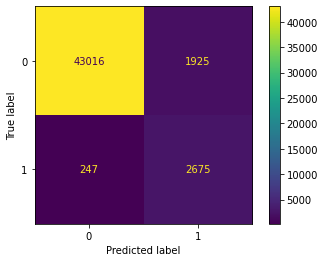

In [10]:
from sklearn.preprocessing import StandardScaler
data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
x_ = data_.iloc[:,15:]
y = data_["classifier"]
y = np.array(y)[:,None]
x = np.array(x_)

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X = x
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled.shape
# #Applying Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
components = 15
pca = PCA(n_components = components)
# # perform PCA on the scaled data
pca.fit(X_scaled)
pca
# # print the explained variances
# print("Variances (Percentage):")
# print(pca.explained_variance_ratio_ * 100)
# print()
# print("Cumulative Variances (Percentage):")
# print(pca.explained_variance_ratio_.cumsum() * 100)
# print()
# pca.components_
# # plot a scree plot
# components = len(pca.explained_variance_ratio_) if components is None else components
# plt.plot(range(1,components+1), 
#          np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")
# plt.show()
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.5)
# pca.fit(X_scaled)
# print("Cumulative Variances (Percentage):")
# print(np.cumsum(pca.explained_variance_ratio_ * 100))
# components = len(pca.explained_variance_ratio_)
# print(f'Number of components: {components}')

# # Make the scree plot
# plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance (%)")
# pca_components = abs(pca.components_)
# print(pca_components)

# print('Top 4 most important features in each component')
# print('===============================================')
# for row in range(pca_components.shape[0]):
#     # get the indices of the top 4 values in each row
#     temp = np.argpartition(-(pca_components[row]), 4)
#     # sort the indices in descending order
#     indices = temp[np.argsort((-pca_components[row])[temp])][:4]
#     # print the top 4 feature names
#     print(f'Component {row}: {x_.columns[indices].to_list()}')

# #Transforming all the 30 Columns to the 6 Principal Components
# X_pca = pca.transform(X_scaled)
# print(X_pca.shape)
# print(X_pca)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = 13)
model_ = LogisticRegression()
# log_regress_model = Pipeline([
#     ('std_scaler', _sc),
#     ('pca', _pca),
#     ('regressor', _model)
# ])
X = _sc.fit_transform(X)
X = _pca.fit_transform(X)
# perform a split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3,
                shuffle=True)

# train the model using the PCA components
model_.fit(X_train,y_train)
model_.score(X_test,y_test)
y_pred_test = model_.predict_proba(X_test)[:, 1]
y_pred_class_test = [1 if prob > 0.094060344 else 0 for prob in y_pred_test]
y_predicted = np.array(y_pred_class_test).reshape(47863, 1)#31909
arr = np.append(y_predicted, np.array(y_test),1)
df = pd.DataFrame(arr, columns = ["Predicted", "Actual"])
#df.to_excel("Test_PRED.xlsx")
cm = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)
print('The f1 score for the model is:',f1_score(y_test, y_predicted))
print('The precision score for the model model is:', precision_score(y_test, y_predicted))
print('The recall score for the model model is:', recall_score(y_test, y_predicted))

# print(f"TRUE Positives : {tp} ; False Positives : {fp}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

Variances (Percentage):
[24.65432252 14.51198765  6.71592677  3.62099733  3.33042101  2.71310152
  2.38429761  2.3733099   1.82236894  1.68917678  1.63926101  1.59896017
  1.54314973  1.46237077  1.41986313  1.3630543   1.32334355  1.26147383
  1.23678444  1.17873262  1.1288439   1.04775585  1.02823127  1.00875297
  0.92625135  0.88255852  0.83677631  0.79051921  0.77656253  0.75150025
  0.70662431  0.66148661  0.6389918   0.59030892  0.57833846  0.570558
  0.52232318  0.50314034  0.48210878  0.46053681  0.45648792  0.44426801
  0.43930258  0.41314346  0.3977117   0.38425891  0.37174963  0.34845866
  0.34506813  0.3309362   0.32258511  0.32021869  0.31713155  0.30821115
  0.29655363  0.28855568  0.27663106  0.26843902  0.26177611  0.25503198
  0.20953999  0.20886787]

Cumulative Variances (Percentage):
[ 24.65432252  39.16631017  45.88223695  49.50323427  52.83365528
  55.5467568   57.93105441  60.30436431  62.12673325  63.81591003
  65.45517103  67.05413121  68.59728094  70.05965171  

2023-08-21 15:47:02,488 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8236633725424649
The f1 score for the model is: 0.32176149148183864
The precision score for the model model is: 0.2103604076914994
The recall score for the model model is: 0.6839767680218654


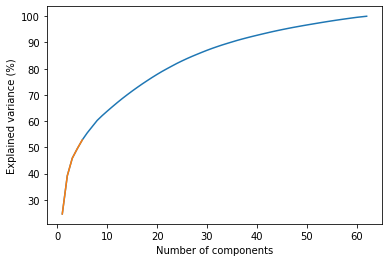

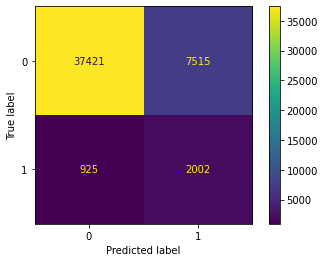

In [11]:
from sklearn.preprocessing import StandardScaler
data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
x_ = data_.iloc[:,15:-1]
y = data_["classifier"]
y = np.array(y)[:,None]
x = np.array(x_)

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
X = x
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#Applying Principal Component Analysis (PCA)

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

# plot a scree plot
components = len(pca.explained_variance_ratio_) if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.5)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
pca_components = abs(pca.components_)
print(pca_components)

print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    # print the top 4 feature names
    print(f'Component {row}: {x_.columns[indices].to_list()}')

#Transforming all the 30 Columns to the 6 Principal Components
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)




#Creating a Machine Learning Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# perform a split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3,
                shuffle=True)

# train the model using the PCA components
log_regress_model.fit(X_train,y_train)
log_regress_model.score(X_test,y_test)
y_pred_test = log_regress_model.predict_proba(X_test)[:, 1]
y_pred_class_test = [1 if prob > 0.094060344 else 0 for prob in y_pred_test]
y_predicted = np.array(y_pred_class_test).reshape(47863, 1)#31909
arr = np.append(y_predicted, np.array(y_test),1)
df = pd.DataFrame(arr, columns = ["Predicted", "Actual"])
#df.to_excel("Test_PRED.xlsx")
cm = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)
print('The f1 score for the model is:',f1_score(y_test, y_predicted))
print('The precision score for the model model is:', precision_score(y_test, y_predicted))
print('The recall score for the model model is:', recall_score(y_test, y_predicted))

# print(f"TRUE Positives : {tp} ; False Positives : {fp}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 


In [12]:
data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
x = data_.iloc[:,15:-1]
x

,AerialAbility_Technical,CommandOfArea_Technical,Communication_Behavioral,Eccentricity_Behavioral,Handling_Technical,Kicking_Technical,OneOnOnes_Technical,Reflexes_Technical,RushingOut_Technical,TendencyToPunch_Technical,...,InjuryProness_Technical,Versatility_Behavioral,Adaptability_Behavioral,Ambition_Behavioral,Loyalty_Behavioral,Pressure_Behavioral,Professional_Behavioral,Sportsmanship_Behavioral,Temperament_Behavioral,Controversy_Behavioral
0,1,1,2,2,3,3,1,4,1,2,...,7,4,20,6,3,9,3,10,14,11
1,12,3,5,1,12,6,2,1,6,6,...,6,6,14,10,7,11,11,12,10,6
2,1,2,4,2,1,1,1,3,3,2,...,5,5,9,11,14,7,11,13,10,8
3,1,3,1,3,2,2,1,2,3,3,...,5,6,16,13,11,9,10,13,13,7
4,3,3,2,3,1,1,3,3,2,1,...,5,5,13,11,9,10,12,10,19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159536,1,1,1,1,1,1,1,1,1,1,...,5,8,11,2,15,8,11,11,10,7
159537,1,1,1,1,1,1,1,1,1,1,...,3,11,19,12,11,10,10,12,19,3
159538,1,1,1,1,1,1,1,1,1,1,...,8,8,11,13,11,12,11,12,13,3
159539,1,1,1,1,1,1,1,1,1,1,...,9,13,13,9,11,11,14,15,14,2


In [96]:
data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
#x = data_.iloc[:,15:-1]
#y = data_["classifier"]
#y.value_counts()
from sklearn.utils import resample
pred_0 = data_[data_["classifier"]==0]
pred_1 = data_[data_["classifier"]==1]
pred_1_upsample = resample(pred_1, replace=True, n_samples=50000, random_state=0)

data_f = pd.concat([pred_0, pred_1_upsample])
data_f['classifier'].value_counts()

0    149905
1     50000
Name: classifier, dtype: int64

In [94]:
from imblearn.over_sampling import SMOTE as alg#SMOTE
df_train = data
x = df_train.iloc[:,15:-1]
y = df_train["classifier"]
sm = alg(sampling_strategy = 0.35,random_state=0)
oversampled_X, oversampled_Y = sm.fit_resample(x,y)
data_f = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)
data_f['classifier'].value_counts()

0    149905
1     52466
Name: classifier, dtype: int64

2023-08-23 00:08:47,409 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Accuracy: 0.9860268125125058
The f1 score for the model is: 0.9721631676853575
The precision score for the model model is: 0.9628874119892084
The recall score for the model model is: 0.9816193734487154


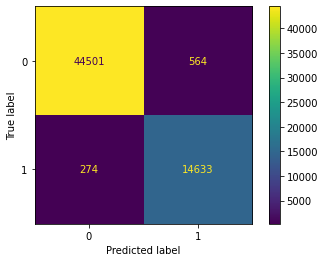

In [97]:
# w1 = 0.86070351758794
# w2 = 1-0.86070351758794
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
model = RandomForestClassifier() #15:76 - Main sheet #class_weight
data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
x = data_.iloc[:,15:-1]
y = data_["classifier"]
y = np.array(y)[:,None]
x = np.array(x)

sc = StandardScaler()
pc = PCA(n_components=55)
x  = sc.fit_transform(x)
#x = pc.fit_transform(x)
#print(x.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=3)
#x_train.shape
#pc.explained_variance_ratio_
model.fit(x_train, y_train)#

y_pred_test = model.predict_proba(x_test)[:, 1]#0.094060344
y_pred_class_test = [1 if prob > 0.5 else 0 for prob in y_pred_test]
y_predicted = np.array(y_pred_class_test).reshape(len(y_pred_class_test), 1) #47863
arr = np.append(y_predicted, np.array(y_test),1)
df = pd.DataFrame(arr, columns = ["Predicted", "Actual"])
#df.to_excel("Test_PRED.xlsx")
cm = confusion_matrix(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)
print('The f1 score for the model is:',f1_score(y_test, y_predicted))
print('The precision score for the model model is:', precision_score(y_test, y_predicted))
print('The recall score for the model model is:', recall_score(y_test, y_predicted))

# print(f"TRUE Positives : {tp} ; False Positives : {fp}")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

2023-08-21 15:48:46,948 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8404822096400142
The f1 score for the model is: 0.3384455419807642
The precision score for the model model is: 0.22437959558823528
The recall score for the model model is: 0.6884032428621784


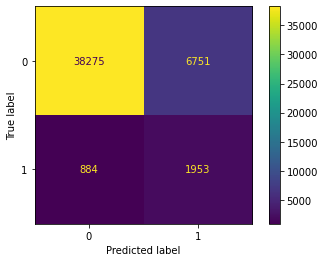

2023-08-21 15:48:51,047 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8408164970854314
The f1 score for the model is: 0.33983190364786414
The precision score for the model model is: 0.22529871323529413
The recall score for the model model is: 0.6912231230172717


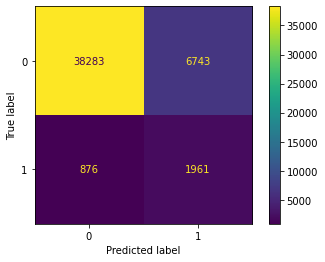

2023-08-21 15:48:54,818 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8410881056348327
The f1 score for the model is: 0.3401006420267222
The precision score for the model model is: 0.2255725630107032
The recall score for the model model is: 0.6908706379978851


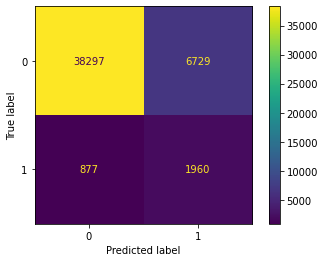

2023-08-21 15:48:58,355 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8409209619121242
The f1 score for the model is: 0.3394065590838105
The precision score for the model model is: 0.2251122108412936
The recall score for the model model is: 0.6894606979203384


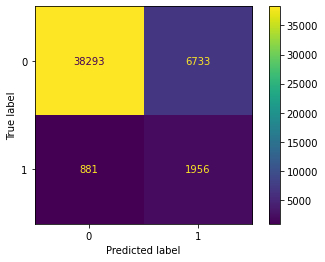

2023-08-21 15:49:02,352 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8404613166746756
The f1 score for the model is: 0.3385308385308385
The precision score for the model model is: 0.22441713563799243
The recall score for the model model is: 0.688755727881565


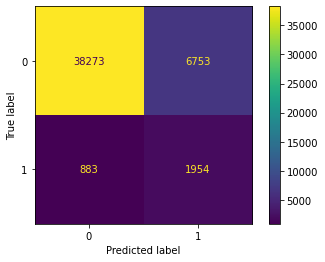

2023-08-21 15:49:06,512 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8414850719762655
The f1 score for the model is: 0.3411202778983934
The precision score for the model model is: 0.22631942843973266
The recall score for the model model is: 0.6922805780754318


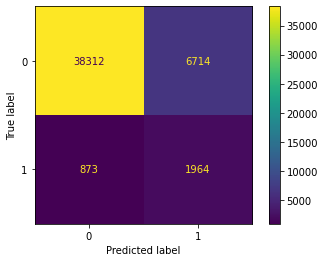

2023-08-21 15:49:10,405 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8414223930802499
The f1 score for the model is: 0.34080250130276185
The precision score for the model model is: 0.22611501671084477
The recall score for the model model is: 0.6915756080366584


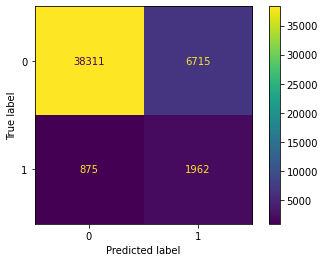

2023-08-21 15:49:14,370 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8413806071495727
The f1 score for the model is: 0.34039965247610776
The precision score for the model model is: 0.22587340020754065
The recall score for the model model is: 0.6905181529784984


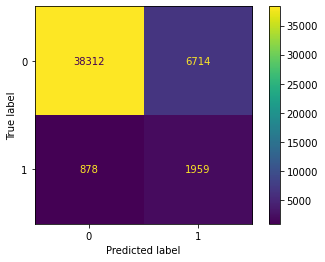

2023-08-21 15:49:16,621 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8414641790109271
The f1 score for the model is: 0.3405179906135929
The precision score for the model model is: 0.2259776214096205
The recall score for the model model is: 0.6905181529784984


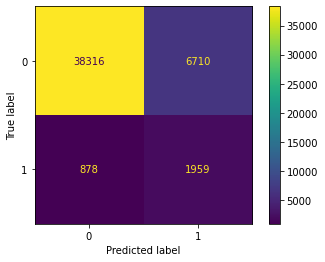

2023-08-21 15:49:19,020 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8418611453523599
The f1 score for the model is: 0.3406220054011674
The precision score for the model model is: 0.2262207822263365
The recall score for the model model is: 0.6891082129009517


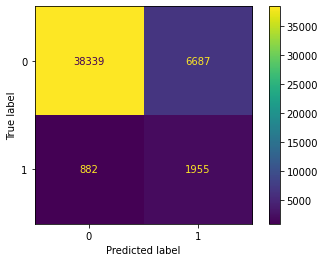

2023-08-21 15:49:21,701 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8419238242483755
The f1 score for the model is: 0.3408259278619969
The precision score for the model model is: 0.2263626895035297
The recall score for the model model is: 0.6894606979203384


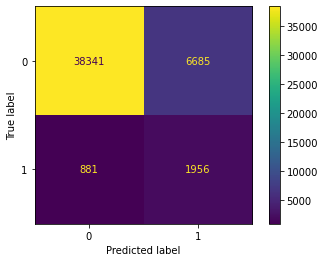

2023-08-21 15:49:23,959 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8419447172137141
The f1 score for the model is: 0.3408556242920624
The precision score for the model model is: 0.2263888888888889
The recall score for the model model is: 0.6894606979203384


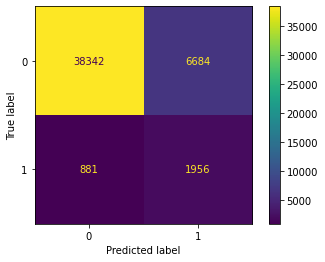

2023-08-21 15:49:26,299 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8421118609364227
The f1 score for the model is: 0.34155267055850835
The precision score for the model model is: 0.22685185185185186
The recall score for the model model is: 0.6908706379978851


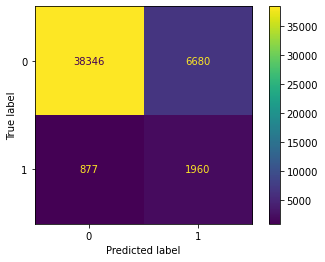

2023-08-21 15:49:28,585 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8417775734910056
The f1 score for the model is: 0.34142099312983737
The precision score for the model model is: 0.22662202724543984
The recall score for the model model is: 0.6919280930560451


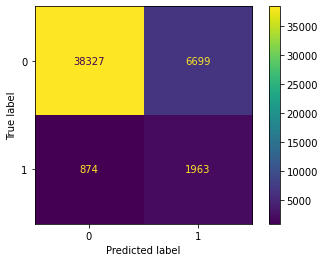

2023-08-21 15:49:31,026 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8423207905898085
The f1 score for the model is: 0.341735717400785
The precision score for the model model is: 0.22705146036161336
The recall score for the model model is: 0.6905181529784984


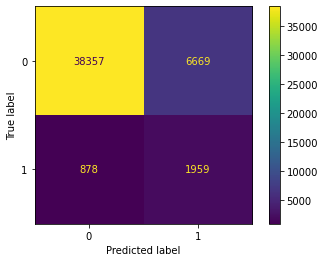

2023-08-21 15:49:33,585 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8423416835551469
The f1 score for the model is: 0.34176552686671313
The precision score for the model model is: 0.22707777906572388
The recall score for the model model is: 0.6905181529784984


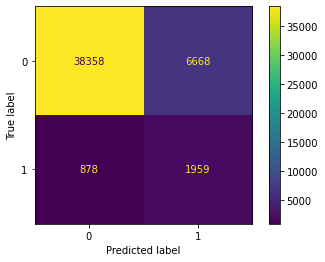

2023-08-21 15:49:36,109 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8422581116937927
The f1 score for the model is: 0.34153148438862724
The precision score for the model model is: 0.2269092594738672
The recall score for the model model is: 0.6901656679591117


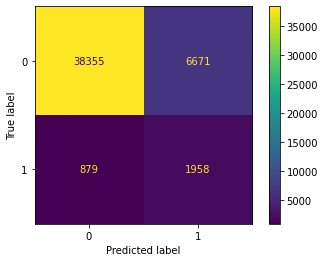

2023-08-21 15:49:38,618 [28892] WARNING  py.warnings:109: [JupyterRequire] c:\Users\ansht\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy: 0.8423625765204855
The f1 score for the model is: 0.3419101613606629
The precision score for the model model is: 0.22716736207695873
The recall score for the model model is: 0.6908706379978851


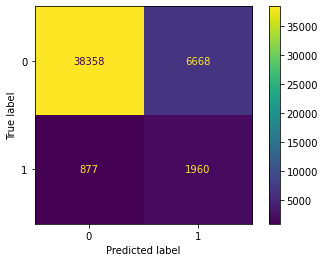

In [16]:
# w1 = 0.86070351758794
# w2 = 1-0.86070351758794
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

for n in range(42,60):
    model = LogisticRegression() #15:76 - Main sheet #class_weight
    data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
    x = data_.iloc[:,15:-1]
    y = data_["classifier"]
    y = np.array(y)[:,None]
    x = np.array(x)


    sc = StandardScaler()
    pc = PCA(n_components=int(n))
    x  = sc.fit_transform(x)
    x = pc.fit_transform(x)

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True, random_state=0)

    #View the shapes of splitted data.

    #shapes of splitted data
    # print("X_train:",x_train.shape)
    # print("X_test:",x_test.shape)
    # print("Y_train:",y_train.shape)
    # print("Y_test:",y_test.shape)

    model.fit(x_train, y_train)

    #Accuracy=r2_score(y_test,y_pred)*100
    #print("Accuracy of the model is %.2f" %Accuracy)
    #0.094060344
    y_pred_test = model.predict_proba(x_test)[:, 1]
    y_pred_class_test = [1 if prob > 0.094060344 else 0 for prob in y_pred_test]
    y_predicted = np.array(y_pred_class_test).reshape(47863, 1)
    arr = np.append(y_predicted, np.array(y_test),1)
    df = pd.DataFrame(arr, columns = ["Predicted", "Actual"])
    #df.to_excel("Test_PRED.xlsx")
    cm = confusion_matrix(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    print("Accuracy:", accuracy)
    print('The f1 score for the model is:',f1_score(y_test, y_predicted))
    print('The precision score for the model model is:', precision_score(y_test, y_predicted))
    print('The recall score for the model model is:', recall_score(y_test, y_predicted))

    # print(f"TRUE Positives : {tp} ; False Positives : {fp}")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

    cm_display.plot()
    plt.show() 